In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# constants
#from toymc import const

In [2]:
from other_limits.Nlimits import *
from other_limits.DPlimits import *

# Global defs

In [3]:
## Plot the parameter space
fsize = 12
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman', 'serif']
rcParams['figure.figsize'] = (1.2*3.7,1.2*2.3617)
# rcParams['lines.linewidth'] = 1.0
rcParams['hatch.linewidth'] = 0.3
# rcParams['axes.linewidth'] = 0.4
rcParams['axes.labelsize'] = fsize
# rcParams['xtick.direction'] = 'in'
# rcParams['xtick.major.width'] = 0.4
# rcParams['xtick.minor.width'] = 0.4
rcParams['xtick.labelsize'] = fsize
# rcParams['ytick.direction'] = 'in'
# rcParams['ytick.major.width'] = 0.4
# rcParams['ytick.minor.width'] = 0.4
rcParams['ytick.labelsize'] = fsize
rcParams['legend.frameon'] = False
rcParams['legend.fontsize'] = 0.8*fsize
rcParams['legend.loc'] = 'lower right'
rcParams["text.latex.preamble"] = r'''
    \usepackage{amsmath,amssymb,amsthm}
    \usepackage{siunitx}
'''

## DARK PHOTON PARAMETER SPACE

In [4]:
X_MIN, X_MAX = 1e-2, 1e1
Y_MIN, Y_MAX = 1e-6, 0.05

mzpr = np.geomspace(X_MIN, X_MAX, 1000)

## g-2 definitions

In [5]:
FNAL_run_combined = gminus2.weighted_average(gminus2.DELTA_FNAL, gminus2.DELTA_BNL)

In [6]:
energy, one_over_alpha = np.loadtxt("./other_limits/DPlimits/digitized/alphaQED/alpha_QED_running_posQ2.dat", unpack = True)
one_over_alpha_ew = interpolate.interp1d(energy, one_over_alpha, kind = "linear")

FACTOR = 1/2/np.pi/one_over_alpha_ew(gminus2.M_MU)

gminus2_sigmas = [2.]
gminus2_colors = ['dodgerblue']

## main plot

In [18]:
# m4 of choice:
this_m4 = 0.1

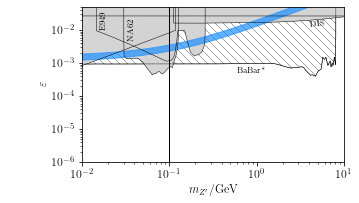

In [19]:
fig = plt.figure()
axes_form = [0.14,0.15,0.82,0.76]
ax = fig.add_axes(axes_form)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$m_{Z^\prime}/$GeV')
ax.set_ylabel(r'$\varepsilon$')
    
    
semi_visible_DP.plot_constraints(ax, X_MIN, X_MAX)

gminus2.compute_and_plot_gminus2_region(
    ax = ax, 
    mz = mzpr, 
    delta_amu = FNAL_run_combined[0], 
    error = FNAL_run_combined[1], 
    factor = FACTOR, 
    sigmas = gminus2_sigmas, 
    colors = gminus2_colors 
)

ax.axvline(x=this_m4, color='black', lw=1)

ax.annotate(r'$(g-2)_\mu$', xy=(2e-3,2e-3), rotation=4, fontsize=0.7*fsize, color='darkblue')

ax.set_xlim(X_MIN,X_MAX)
fig.savefig("poster_plots/dark_photon.pdf")
plt.show()

## Heavy neutrino parameter space

In [20]:

################################
# range of N mass
MN_MIN = 1e-3 # GeV
MN_MAX = 1e2 # GeV
MN = np.logspace(np.log10(MN_MIN),np.log10(MN_MAX),1000)


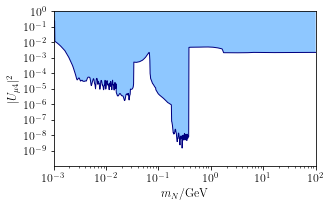

In [21]:
fig = plt.figure()
axes_form = [0.14,0.15,0.82,0.76]
ax = fig.add_axes(axes_form)
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(Y_MIN, Y_MAX)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$m_{N}$/GeV")
ax.set_ylabel(r'$|U_{\mu4 }|^2$')
    
    


usqr_bound = umu4.USQR(MN)
usqr_bound_inv = umu4.USQR_inv(MN)

##############################################
# Constraints on U\alpha4^2
# Minimal HNL -- no Zprime and all that
# ax.plot(MN, usqr_bound, color='navy', )
# ax.fill_between(MN, usqr_bound, np.ones(np.size(MN)), 
#             fc='dodgerblue', ec='None', lw =0.0, alpha=0.5, label=r'all bounds')

# most model independent bounds
ax.plot(MN, usqr_bound_inv, color='navy', lw=1)
ax.fill_between(MN, usqr_bound_inv, np.ones(np.size(MN)), 
            fc='dodgerblue', ec='None', lw =0.0, alpha=0.5, label=r'all bounds')

ax.set_xlim(MN_MIN,MN_MAX)
ax.set_ylim(1e-10,1)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1,1])

fig.savefig('poster_plots/umu4SQR.pdf')
